The following is from [this article](https://medium.com/towards-data-science/understanding-predictive-maintenance-wave-data-feature-engineering-part-2-spectral-3eced3bdbb3e) in Medium.

# Frequency-Domain Features

Transitioning to the frequency domain, we employ techniques like the `Fast Fourier Transform (FFT)` to convert time-domain signals. Extracted features include `dominant frequency`, `spectral entropy`, and `spectral kurtosis`. `Power Spectral Density (PSD)` and `Harmonic Ratios` offer insights into power distribution and harmonic relationships.

- `FFT (Fast Fourier Transform)` Convert the time-domain signal to the frequency domain. Extract features from the resulting spectrum, such as `dominant frequency`, `spectral entropy`, and `spectral kurtosis`.

- `Power Spectral Density (PSD)` Describes how the power of a signal is distributed over frequency.

# Create the signal for experiments

Let’s generate the signal:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate a sinusoidal signal
    signal = amplitude * np.sin(2 * np.pi * frequency * t)

    # Add random noise to simulate real-world conditions
    noise = np.random.normal(0, noise_level, signal.shape)
    signal_with_noise = signal + noise

    # Simulate equipment wear
    wear = np.linspace(0, max_wear, len(t))
    wear[wear > wear_threshold] = 0  # Reset wear if it exceeds the threshold
    signal_with_wear = signal_with_noise + wear

    return t, signal_with_wear

In [3]:
# Parameters
duration = 20  # seconds
sampling_rate = 500  # Hz  (Needs to be higher than frequency to certain degree)
frequency = 5  # Hz (vibration frequency)
amplitude = 1.0  # Min Max range
noise_level = 0.3  # Noise factor to increase reality
max_wear = 1  # Maximum wear before reset
wear_threshold = 0.5  # Wear threshold for reset

In [4]:
# Generate synthetic vibration signal with wear and threshold
t, vibration_signal = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

# Fast Fourier Transform (FFT) and Short-Time Fourier Transform (STFT)

### Signal Representation

Let’s start with our signal, which is essentially a series of data points representing how the signal changes over time. This could be a sound wave, a sequence of numbers, or any other data that varies with time.

### Discrete Fourier Transform (DFT)

The `FFT` is a more efficient way of computing something called the `Discrete Fourier Transform (DFT)`. The `DFT` takes our signal and expresses it as a sum of sinusoidal functions, each representing a different frequency component. This is where the magic happens.

### Divide and Conquer

Instead of directly computing the `DFT` for the entire signal, `FFT` takes advantage of the fact that a `DFT` of any composite signal can be expressed as the combination of `DFTs` of its subparts. It divides the signal into smaller sections, computes the `DFT` for each section, and then combines them.

### Butterfly Operation

The magic of `FFT` lies in a process called the butterfly operation. It’s like a dance move where the computed frequencies are paired up and combined in a specific way. This happens recursively until we have the final frequency components of the entire signal.

### Efficiency Boost

The key to `FFT`’s speed is its ability to dramatically reduce the number of computations needed compared to the straightforward `DFT` approach. By exploiting the symmetries and patterns in the signal, `FFT` efficiently calculates the frequency components.

### Time for code

Now we can apply the theory into practice in simple code lines:

In [5]:
# Apply FFT to the signal
fft_result = np.fft.fft(vibration_signal)

In [6]:
len(fft_result)

10000

In [7]:
# This very important part, let`s investigate it more in depth
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

`len(fft_result)` This is the length of the `FFT` result, which is essentially the number of points in the frequency domain. The FFT operation transforms a time-domain signal into a frequency-domain signal and `len(fft_result)` gives you the number of frequency bins.

`1/sampling_rate` This is the inverse of the sampling rate `sampling_rate`, representing the time interval between samples in the original time-domain signal. The sampling rate is the number of samples per second.

`np.fft.fftfreq()` This function generates the frequencies corresponding to the `FFT` result. It takes two parameters. The first one is the length of the result `len(fft_result)`, and the second one is the sampling interval `1/sampling_rate`. It returns an array of frequencies.

But do not worry. Using these two lines, the whole ‘magic’ will happen

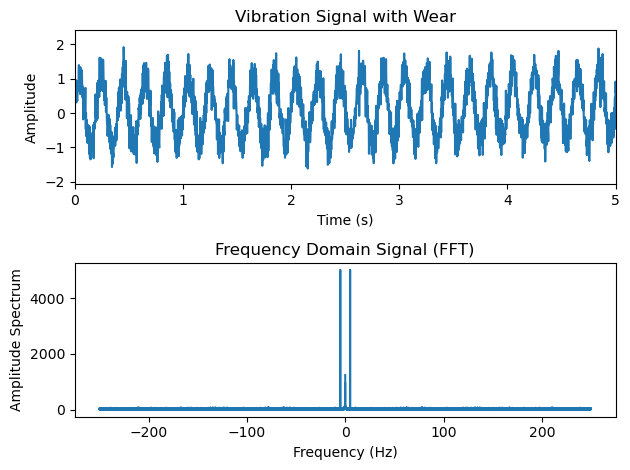

In [8]:
# Plot the time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t, vibration_signal)
plt.title("Vibration Signal with Wear")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 5)

# Plot the frequency-domain signal (FFT)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")

plt.tight_layout()
plt.show()

In the plot, we notice a central signal at 0, flanked by two mirrored symmetrical signals on the positive and negative sides. This indicates that our signal is comprised of a single distinct wave. Before delving into experiments, let’s first explore the concept of symmetry, and afterward, we can conduct experiments with various signals.

### Behind the scenes — FFT symmetry

What is happening on the backstage? We have some math and theoretical concepts. Let’s make it easy.

In many real-world scenarios, signals are composed of real numbers. In the time domain, these signals can be represented as a sequence of values. When you take the `FFT` of a real-valued signal, the resulting frequency spectrum is symmetric.

`Complex conjugate pairs` the symmetry comes from the fact that the `FFT` involves complex numbers. For every positive frequency component, there is a corresponding negative frequency component with the same magnitude. These pairs of frequencies are complex conjugates of each other.

`Mirrored information` The positive frequencies represent the information about how the signal oscillates in one direction, while the negative frequencies represent the same information but in the opposite direction. The `FFT` captures both directions, and that’s why the plot looks symmetrical

In summary, the symmetry in the `FFT` is a consequence of the mathematical properties of real-valued signals and complex numbers in the context of the `FFT`.

### Let’s start the next experiments

Now we understand the basic concepts of the `FFT`. Let’s simulate 2 signals with different parameters connected together

We will generate a second similar signal we will only focus on Frequency and amplitude:

In [9]:
# First Signal
frequency = 10
amplitude = 1

In [10]:
t1, vibration_signal_1 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [11]:
# Second Signal
frequency = 20
amplitude = 1

In [12]:
t2, vibration_signal_2 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [13]:
# Combine the signals just simply add them :)
combined_signal = vibration_signal_1 + vibration_signal_2

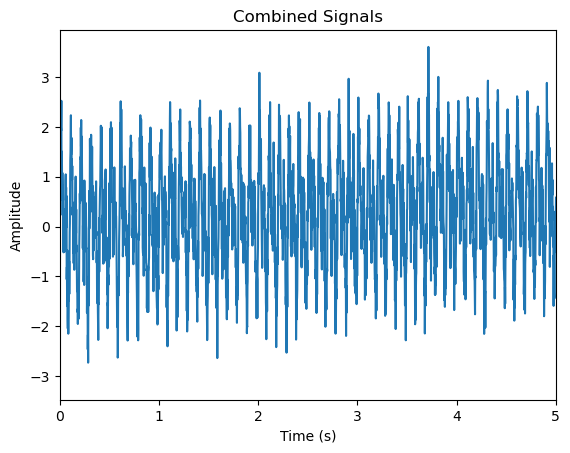

In [14]:
plt.plot(t2, combined_signal, label="Signal 1")
plt.title("Combined Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 5)
plt.show()

Now let’s make `FFT` and plot results:

In [15]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

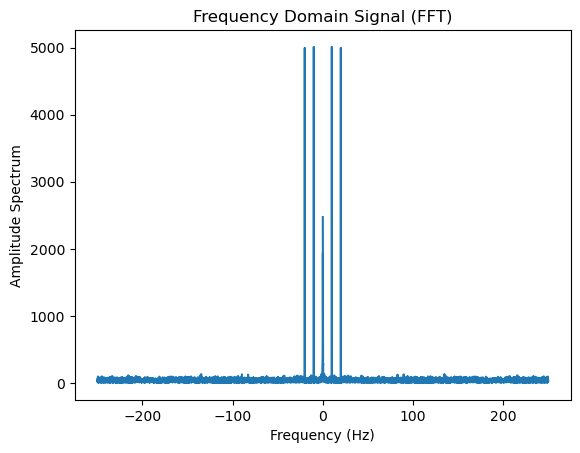

In [16]:
# Plot the frequency-domain signal (FFT)
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")
plt.show()

Now you can see we have the same amplitude height but 2 more signals equally offset. `First signal = 10Hz` `Second signal = 20Hz`

The X-axis position is adjusted for signal frequency. Let's introduce the third signal = 100 Hz and plot.

In [17]:
frequency = 100
amplitude = 1

In [18]:
t3, vibration_signal_3 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [19]:
# Combine the signals just simply add them :)
combined_signal = vibration_signal_1 + vibration_signal_2 + vibration_signal_3

In [20]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

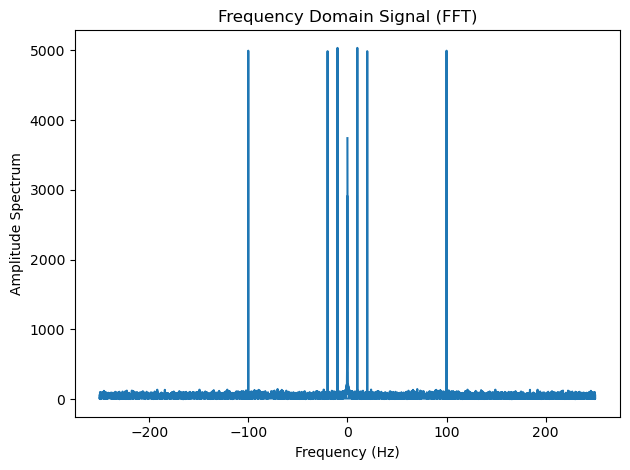

In [21]:
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")

plt.tight_layout()
plt.show()

As we can see our “new” signal is now much more offset due to the higher frequency value

What will happen if we add a fourth signal with a different amplitude

Make a new signal and plot it together

In [22]:
frequency = 150  # Just for make offset, now you know how it works
amplitude = 2

In [23]:
t4, vibration_signal_4 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [24]:
# Combine the signals
combined_signal = (
    vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4
)

In [25]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

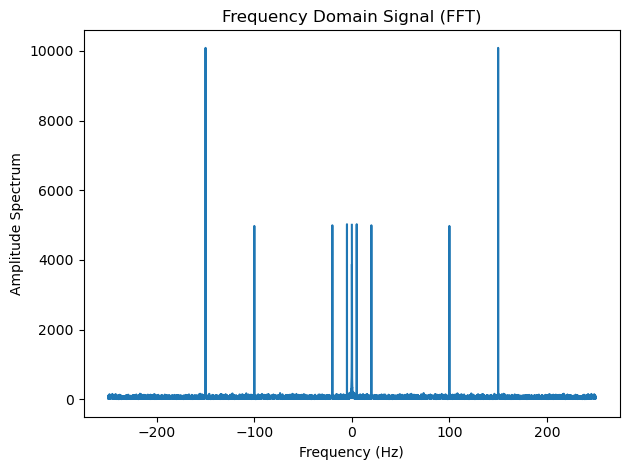

In [26]:
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")

plt.tight_layout()
plt.show()

Now you can see our Amplitude spectrum is twice higher due to amplitude values 1 and 2

# Power Spectral Density (PSD)